In [157]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder,Normalizer,MinMaxScaler,LabelEncoder,StandardScaler
from sklearn.feature_selection import SelectKBest
from sklearn.metrics import classification_report,roc_auc_score,roc_curve
from sklearn.impute import KNNImputer,SimpleImputer
from sklearn.tree import DecisionTreeClassifier


In [158]:
df = pd.read_csv("../ready_to_model_data.csv")
df=df.drop(columns="Unnamed: 0")
df

,PROMISE_STATUS_O,EXTENSION_ELIGIBLE_Y,F0223_NUMBER_OF_EXTENSIONS,lastchannel_Z,REM_TM_RAT_OBS,ApplicantFICOScore,Appl_Debt,F0066_CONTACT_NO_PROMISE_COUNT,F0315_DAYS_SINCE_LAST_PROMISE_1,F0065_PROMISES_TAKEN_COUNT,...,DepreciationRate,Appl_Income,PTI_BOOKED,SalesTax,DOWN_CASH,FINANCED_AMOUNT,F0089_PROMISE_AMT_1,F0180_CURRENT_INTEREST_RATE,BAL_RAT_TRN_6.1,DPD_bool
0,0.0,0.0,3.0,1.0,0.0,0.0,1075.05,12.0,5.0,25.0,...,0.694261,4138.00,0.0964,708.22,0.0,15057.22,382.68,0.1999,0.01,False
1,0.0,1.0,0.0,1.0,0.0,0.0,1138.75,3.0,45.0,3.0,...,0.776757,4166.67,0.1006,0.00,3500.0,20095.17,419.21,0.1425,0.03,False
2,0.0,1.0,0.0,1.0,0.0,551.0,767.83,0.0,3.0,3.0,...,0.834200,2833.33,0.1525,1916.82,5000.0,18764.82,432.01,0.1808,0.03,False
3,1.0,0.0,2.0,1.0,0.0,468.0,1071.20,14.0,-11.0,10.0,...,0.810160,4000.00,0.0903,0.00,3000.0,15077.00,361.22,0.1970,0.02,False
4,0.0,1.0,0.0,1.0,0.0,523.0,726.64,2.0,80.0,7.0,...,0.810160,2069.02,0.1354,880.60,3000.0,10200.54,280.21,0.2134,0.05,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62933,0.0,0.0,2.0,1.0,0.0,496.0,1808.27,4.0,17.0,7.0,...,0.776757,4991.09,0.0877,1040.82,2000.0,17252.97,437.95,0.1800,0.01,False
62934,1.0,1.0,0.0,1.0,0.0,458.0,720.43,1.0,-16.0,9.0,...,0.856943,2218.75,0.1728,841.68,2100.0,15382.68,402.48,0.2140,0.03,False
62935,0.0,1.0,1.0,1.0,0.0,567.0,852.94,3.0,288.5,13.0,...,0.629297,2810.34,0.1321,872.19,1500.0,15924.07,371.17,0.1650,0.04,False
62936,0.0,0.0,4.0,1.0,0.0,447.0,1026.95,11.0,31.0,16.0,...,0.629297,3704.74,0.1338,1152.30,4000.0,18715.30,500.00,0.2425,0.00,True


In [159]:
df["DPD_bool"]=df["DPD_bool"].map({True:1,False:0})
df

,PROMISE_STATUS_O,EXTENSION_ELIGIBLE_Y,F0223_NUMBER_OF_EXTENSIONS,lastchannel_Z,REM_TM_RAT_OBS,ApplicantFICOScore,Appl_Debt,F0066_CONTACT_NO_PROMISE_COUNT,F0315_DAYS_SINCE_LAST_PROMISE_1,F0065_PROMISES_TAKEN_COUNT,...,DepreciationRate,Appl_Income,PTI_BOOKED,SalesTax,DOWN_CASH,FINANCED_AMOUNT,F0089_PROMISE_AMT_1,F0180_CURRENT_INTEREST_RATE,BAL_RAT_TRN_6.1,DPD_bool
0,0.0,0.0,3.0,1.0,0.0,0.0,1075.05,12.0,5.0,25.0,...,0.694261,4138.00,0.0964,708.22,0.0,15057.22,382.68,0.1999,0.01,0
1,0.0,1.0,0.0,1.0,0.0,0.0,1138.75,3.0,45.0,3.0,...,0.776757,4166.67,0.1006,0.00,3500.0,20095.17,419.21,0.1425,0.03,0
2,0.0,1.0,0.0,1.0,0.0,551.0,767.83,0.0,3.0,3.0,...,0.834200,2833.33,0.1525,1916.82,5000.0,18764.82,432.01,0.1808,0.03,0
3,1.0,0.0,2.0,1.0,0.0,468.0,1071.20,14.0,-11.0,10.0,...,0.810160,4000.00,0.0903,0.00,3000.0,15077.00,361.22,0.1970,0.02,0
4,0.0,1.0,0.0,1.0,0.0,523.0,726.64,2.0,80.0,7.0,...,0.810160,2069.02,0.1354,880.60,3000.0,10200.54,280.21,0.2134,0.05,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62933,0.0,0.0,2.0,1.0,0.0,496.0,1808.27,4.0,17.0,7.0,...,0.776757,4991.09,0.0877,1040.82,2000.0,17252.97,437.95,0.1800,0.01,0
62934,1.0,1.0,0.0,1.0,0.0,458.0,720.43,1.0,-16.0,9.0,...,0.856943,2218.75,0.1728,841.68,2100.0,15382.68,402.48,0.2140,0.03,0
62935,0.0,1.0,1.0,1.0,0.0,567.0,852.94,3.0,288.5,13.0,...,0.629297,2810.34,0.1321,872.19,1500.0,15924.07,371.17,0.1650,0.04,0
62936,0.0,0.0,4.0,1.0,0.0,447.0,1026.95,11.0,31.0,16.0,...,0.629297,3704.74,0.1338,1152.30,4000.0,18715.30,500.00,0.2425,0.00,1


In [160]:
X_train,X_test,y_train,y_test=train_test_split(df.drop(columns=["DPD_bool","F0381_DAYS_DELINQUENT_360","D5P_TOT_1"]),df["DPD_bool"],test_size=0.2)


In [165]:
scaler = StandardScaler()
X_train_norm=scaler.fit_transform(X_train)
X_test_norm =scaler.transform(X_test)

In [161]:
dt_1 = DecisionTreeClassifier(max_depth=2,random_state=42)
dt_1.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=2, random_state=42)

Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


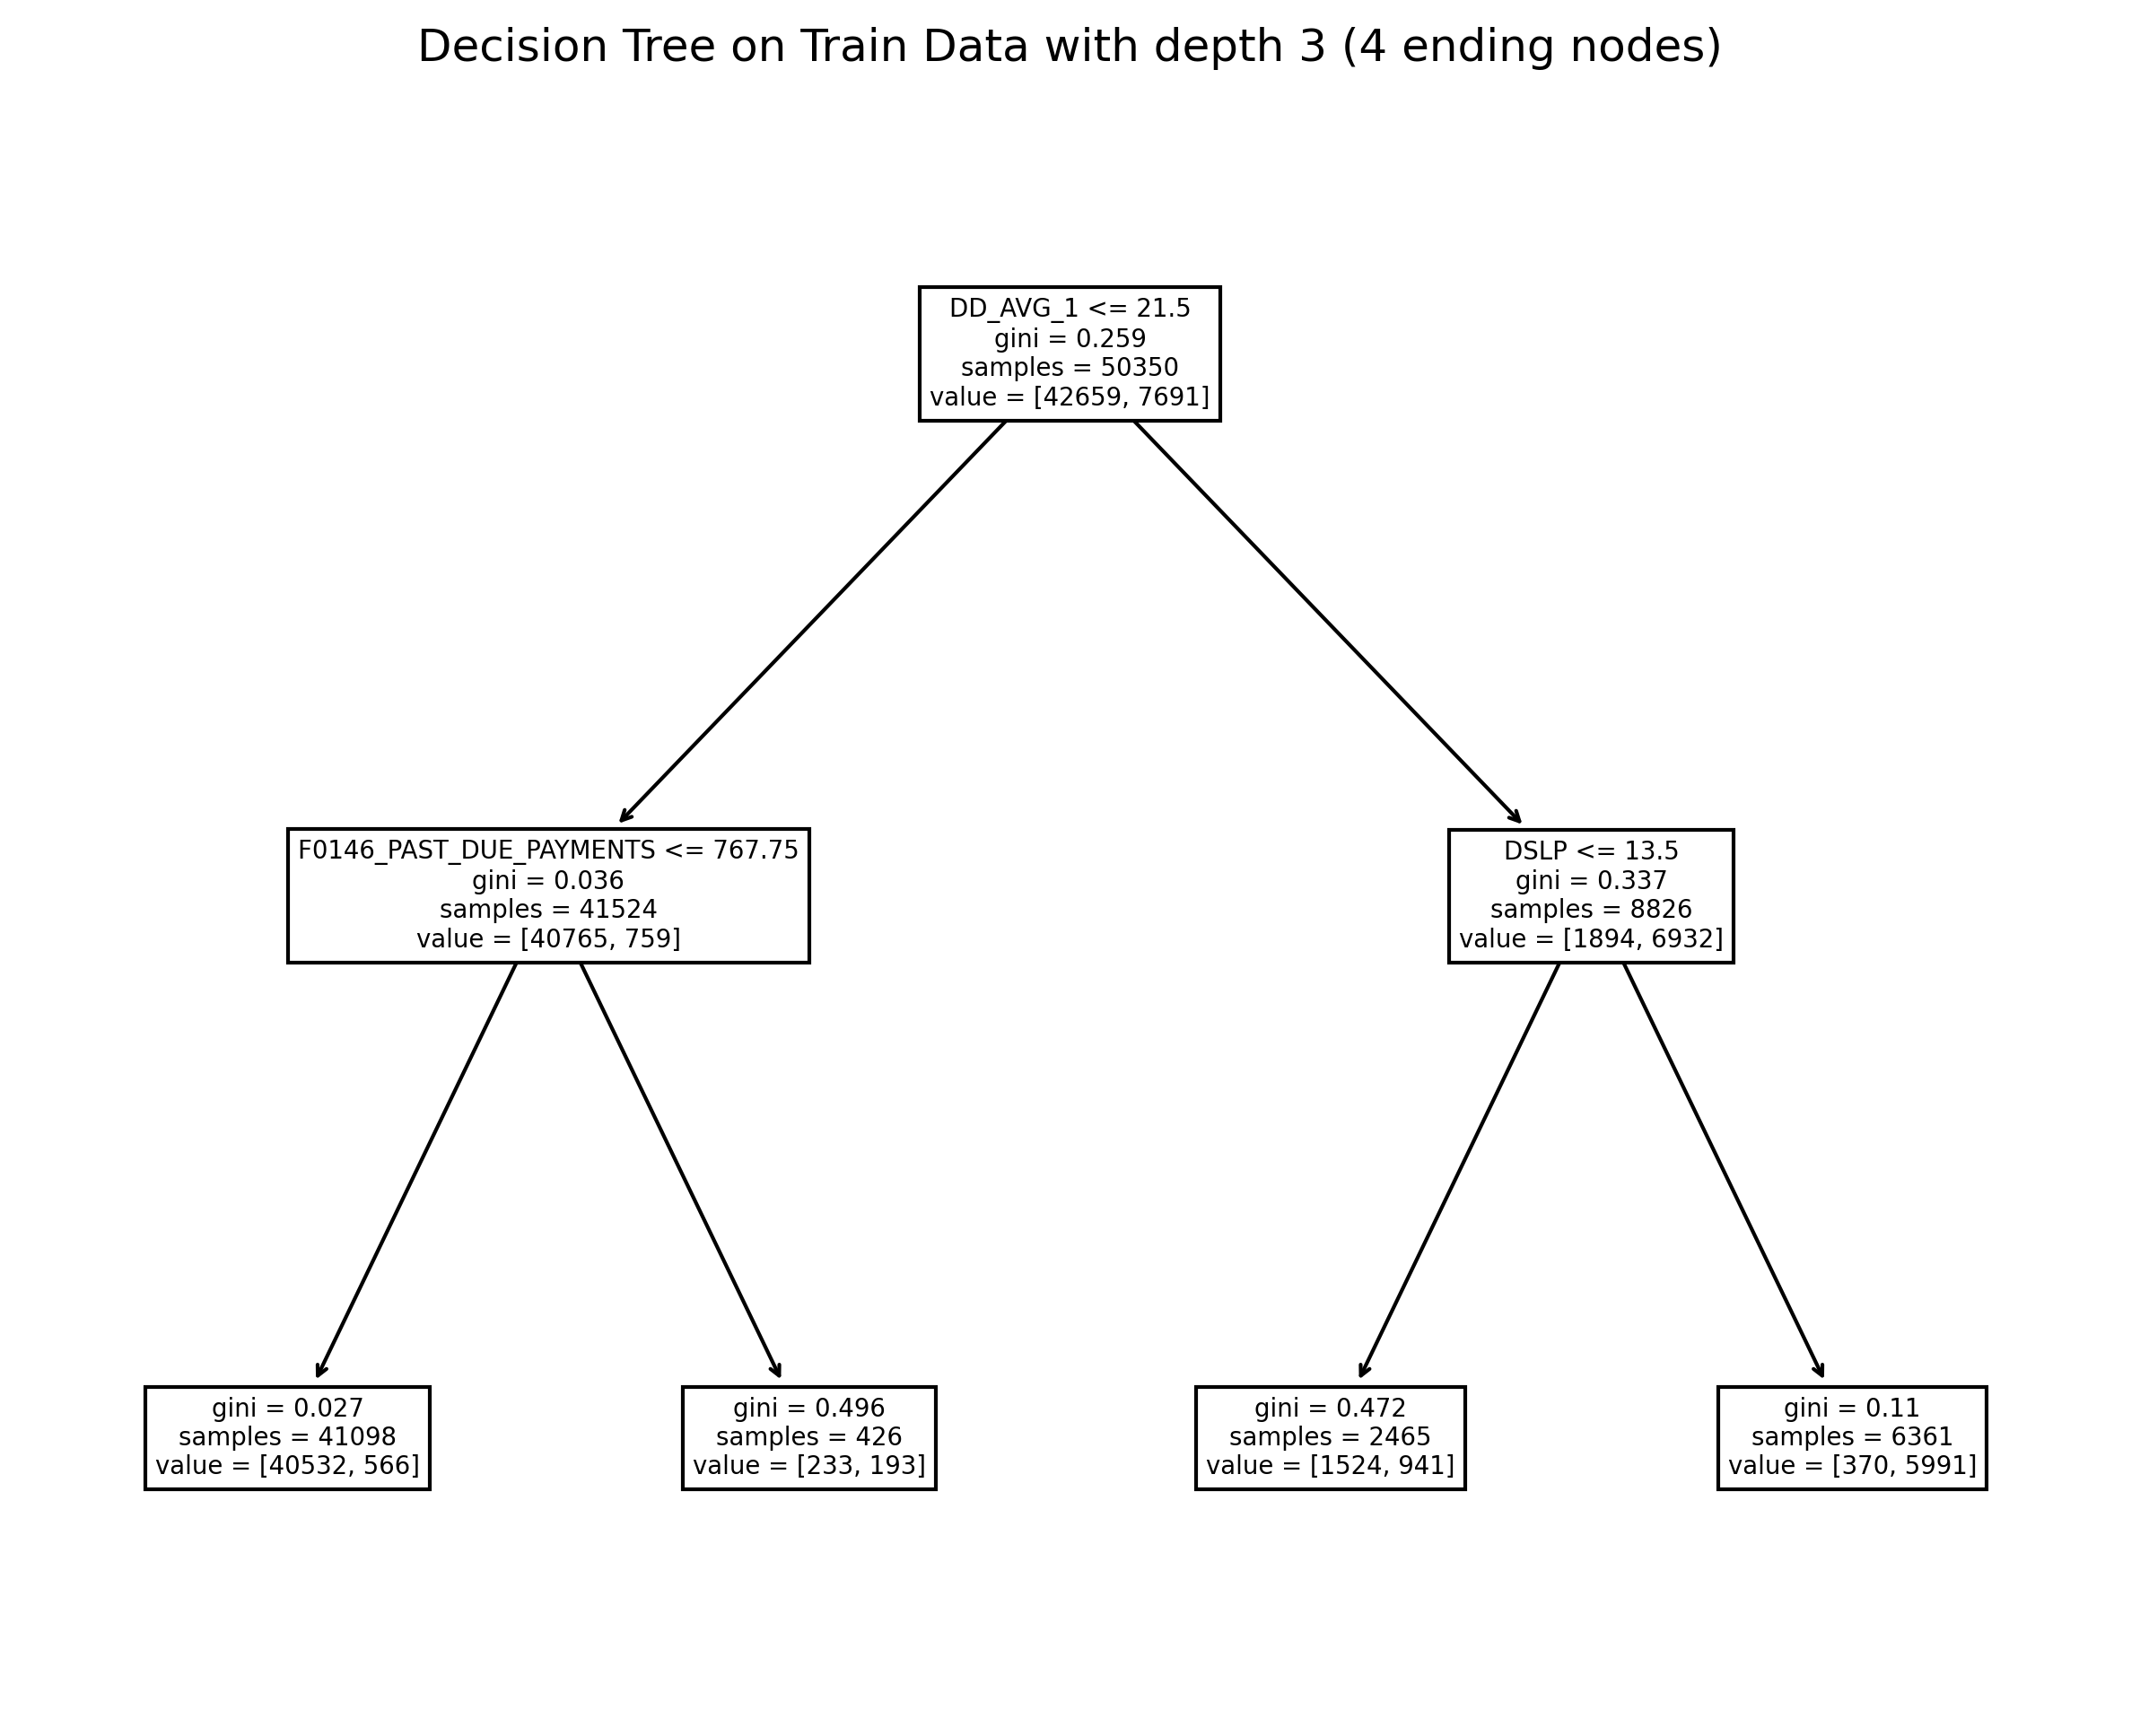

In [162]:
from sklearn import tree
import matplotlib.pyplot as plt
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (10,8), dpi=300)
tree.plot_tree(dt_1,feature_names=X_train.columns)
axes.title.set_text("Decision Tree on Train Data with depth 3 (4 ending nodes)")
fig.savefig("../images/Decision_tree_train_model.png")
fig.show()


In [163]:
y_train_output= dt_1.predict(X_train)
print("Train data Accuracy - Decision Tree")
print(classification_report(y_train,y_train_output))
print("\nROC Score :")
print(roc_auc_score(y_train,y_train_output))

Train data Accuracy - Decision Tree
              precision    recall  f1-score   support

           0       0.96      0.99      0.98     42659
           1       0.94      0.78      0.85      7691

    accuracy                           0.96     50350
   macro avg       0.95      0.89      0.91     50350
weighted avg       0.96      0.96      0.96     50350


ROC Score :
0.8851444950522154


In [164]:
y_test_output = dt_1.predict(X_test)
print("Test data Accuracy - Decision Tree")
print(classification_report(y_test,y_test_output))
print("\nROC Score :")
print(roc_auc_score(y_test,y_test_output))

Test data Accuracy - Decision Tree
              precision    recall  f1-score   support

           0       0.96      0.99      0.98     10652
           1       0.95      0.78      0.86      1936

    accuracy                           0.96     12588
   macro avg       0.96      0.89      0.92     12588
weighted avg       0.96      0.96      0.96     12588


ROC Score :
0.8881964121121089


In [166]:
#Let's do Logistic regression

from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(X_train_norm,y_train)


LogisticRegression()

In [167]:
y_train_output_lr=lr.predict(X_train_norm)
print("Train data Accuracy")
print(classification_report(y_train,y_train_output_lr))

Train data Accuracy
              precision    recall  f1-score   support

           0       0.99      0.99      0.99     42659
           1       0.96      0.93      0.94      7691

    accuracy                           0.98     50350
   macro avg       0.97      0.96      0.97     50350
weighted avg       0.98      0.98      0.98     50350



In [102]:
roc_auc_score(y_train,y_train_output_lr)


0.9594925753342433

In [168]:
y_test_output_lr=lr.predict(X_test)
print("Test data Accuracy")
print(classification_report(y_test,y_test_output_lr))

Test data Accuracy
              precision    recall  f1-score   support

           0       0.86      1.00      0.93     10652
           1       0.99      0.12      0.21      1936

    accuracy                           0.86     12588
   macro avg       0.93      0.56      0.57     12588
weighted avg       0.88      0.86      0.82     12588



In [104]:
roc_auc_score(y_test,y_test_output_lr)

0.5185475444096134

In [169]:
lr.predict_proba(X_train_norm)

array([[1.00902657e-05, 9.99989910e-01],
       [9.61206156e-01, 3.87938443e-02],
       [9.93854777e-01, 6.14522314e-03],
       ...,
       [9.99998737e-01, 1.26298850e-06],
       [9.99998522e-01, 1.47820620e-06],
       [9.99999334e-01, 6.66148105e-07]])

In [170]:
lr.predict_proba(X_test_norm)

array([[9.99990877e-01, 9.12324160e-06],
       [9.99992318e-01, 7.68232438e-06],
       [9.99999617e-01, 3.83467671e-07],
       ...,
       [9.99999642e-01, 3.57566127e-07],
       [9.98795403e-01, 1.20459710e-03],
       [9.99936191e-01, 6.38093458e-05]])

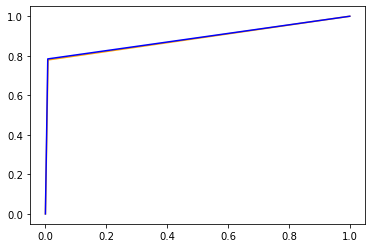

In [171]:
fpr,tpr,threshold = roc_curve(y_train,y_train_output)
fpr1,tpr1,threshold1=roc_curve(y_test,y_test_output)
plt.plot(fpr, tpr,color='orange', label='Decision Tree AUC-ROC curve')
plt.plot(fpr1, tpr1,color='blue', label='Decision Tree AUC-ROC curve')


In [17]:
!pip install xgboost

     |████████████████████████████████| 1.7 MB 1.1 MB/s eta 0:00:01


In [172]:
#xgboost model

import xgboost as xgb
xg_1 = xgb.XGBClassifier(n_estimators=50)
xg_1

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, gamma=None,
              gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, n_estimators=50, n_jobs=None,
              num_parallel_tree=None, predictor=None, random_state=None,
              reg_alpha=None, reg_lambda=None, ...)

In [187]:
model = xg_1.fit(X_train_norm,y_train)
y_train_output_xg=model.predict(X_train_norm)
roc_auc_score(y_train,y_train_output_xg)

0.9997996527596943

In [186]:
X_train_norm=pd.DataFrame(X_train_norm,columns=X_train.columns)
X_test_norm=pd.DataFrame(X_test_norm,columns=X_test.columns)

In [24]:
val={'Feature':X_train_norm.columns,'Importance':xg_1.feature_importances_}
imp_features_df=pd.DataFrame(val)
imp_features_df.sort_values(by="Importance",ascending=False)

,Feature,Importance
24,DD_AVG_1,0.416350
16,DSLP,0.279989
25,BAL_RAT_TRN_6,0.059267
0,PROMISE_STATUS_O,0.037278
15,F0146_PAST_DUE_PAYMENTS,0.031783
23,D31P_TOT_6,0.027418
4,REM_TM_RAT_OBS,0.021014
14,BALANCE_PERCENT_LOAN,0.016236
18,PMT_RAT_OBS,0.014331
34,FINANCED_AMOUNT,0.013155


In [175]:
final_columns=imp_features_df[imp_features_df["Importance"]>0.01]
final_columns

,Feature,Importance
0,PROMISE_STATUS_O,0.037278
4,REM_TM_RAT_OBS,0.021014
14,BALANCE_PERCENT_LOAN,0.016236
15,F0146_PAST_DUE_PAYMENTS,0.031783
16,DSLP,0.279989
18,PMT_RAT_OBS,0.014331
23,D31P_TOT_6,0.027418
24,DD_AVG_1,0.416350
25,BAL_RAT_TRN_6,0.059267
34,FINANCED_AMOUNT,0.013155


In [241]:
xg_2 = xgb.XGBClassifier(n_estimators=100)
xg_2.fit(X_train_norm[final_columns["Feature"]],y_train)

y_train_output_xg2 = xg_2.predict(X_train_norm[final_columns["Feature"]])

In [242]:
print("\nTrain Data AUC Score : ")
roc_auc_score(y_train,y_train_output_xg2)


Train Data AUC Score : 


0.9738992810849622

In [243]:
print("\Test Data AUC Score : ")
roc_auc_score(y_test,xg_2.predict(X_test_norm[final_columns["Feature"]]))

\Test Data AUC Score : 


0.9727895161115128

In [244]:
#Grid Search
from sklearn.model_selection import GridSearchCV
xgb_gcv=xgb.XGBClassifier()

In [245]:
params = {
        'max_depth': [3, 4, 5, 6],
        'learning_rate' : [0.1,0.01,1,0.001],
        'n_estimators' : [50,100,150,200]
}

In [246]:
grid=GridSearchCV(estimator=xgb_gcv,param_grid=params,scoring='roc_auc',n_jobs=4)
# grid = GridSearchCV(estimator=xgb, param_grid=params, scoring='roc_auc', n_jobs=4, cv=skf.split(X,Y), verbose=3 )


In [247]:
grid.fit(X_train_norm[final_columns["Feature"]],y_train,verbose=100)

GridSearchCV(estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     gamma=None, gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None, max_bin=None,
                                     max_cat_to_...
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                

In [248]:
grid.best_estimator_

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.1, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=5, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=200,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

In [249]:
grid_table=pd.DataFrame(grid.cv_results_)
print("XGBoost Grid Search All Results")
grid_table

XGBoost Grid Search All Results


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_learning_rate,param_max_depth,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.745897,0.024320,0.009507,0.000308,0.1,3,50,"{'learning_rate': 0.1, 'max_depth': 3, 'n_esti...",0.998445,0.998689,0.998811,0.998615,0.998808,0.998674,0.000136,36
1,1.335390,0.004982,0.011323,0.000439,0.1,3,100,"{'learning_rate': 0.1, 'max_depth': 3, 'n_esti...",0.999281,0.999291,0.999363,0.999367,0.999413,0.999343,0.000050,26
2,2.048496,0.039662,0.014094,0.000627,0.1,3,150,"{'learning_rate': 0.1, 'max_depth': 3, 'n_esti...",0.999470,0.999455,0.999483,0.999513,0.999540,0.999492,0.000031,12
3,3.081100,0.173435,0.019021,0.000576,0.1,3,200,"{'learning_rate': 0.1, 'max_depth': 3, 'n_esti...",0.999528,0.999532,0.999524,0.999587,0.999587,0.999552,0.000029,8
4,1.115262,0.024983,0.011661,0.000236,0.1,4,50,"{'learning_rate': 0.1, 'max_depth': 4, 'n_esti...",0.998981,0.999256,0.999317,0.999271,0.999305,0.999226,0.000125,27
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59,6.682300,0.237606,0.029008,0.000683,0.001,5,200,"{'learning_rate': 0.001, 'max_depth': 5, 'n_es...",0.997612,0.997328,0.996621,0.996540,0.997756,0.997171,0.000502,46
60,2.102550,0.273340,0.016499,0.001823,0.001,6,50,"{'learning_rate': 0.001, 'max_depth': 6, 'n_es...",0.996396,0.996889,0.996385,0.996010,0.997055,0.996547,0.000378,52
61,3.863891,0.195637,0.021135,0.001707,0.001,6,100,"{'learning_rate': 0.001, 'max_depth': 6, 'n_es...",0.996430,0.996963,0.996560,0.996674,0.998376,0.997001,0.000710,49
62,5.846631,0.307754,0.026267,0.002429,0.001,6,150,"{'learning_rate': 0.001, 'max_depth': 6, 'n_es...",0.996446,0.996980,0.996630,0.996855,0.998416,0.997065,0.000700,47


In [160]:
grid_table.to_csv("../grid_search_params_table.csv")

In [250]:
best_estimator=grid.best_estimator_
best_estimator

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.1, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=5, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=200,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

In [251]:
print("Train Data Roc score on best model")
roc_auc_score(y_train,best_estimator.predict(X_train_norm[final_columns["Feature"]]))


Train Data Roc score on best model


0.996608946482059

In [252]:
print("Test Data Roc score best model")
roc_auc_score(y_test,best_estimator.predict(X_test_norm[final_columns["Feature"]]))



Test Data Roc score best model


0.9911726506177398

In [185]:
#Grid Search code in one cell
from sklearn.model_selection import GridSearchCV
xgb_gcv=xgb.XGBClassifier()
params = {
        'max_depth': [3, 4, 5, 6],
        'learning_rate' : [0.1,0.01,1,0.001],
        'n_estimators' : [50,100,150,200]
}
grid=GridSearchCV(estimator=xgb_gcv,param_grid=params,scoring='roc_auc',n_jobs=4)
grid.fit(X_train_norm[final_columns["Feature"]],y_train,verbose=100)
print("Running best model ")
best_estimator=grid.best_estimator_
print("Train Data Roc score on best model")
print(roc_auc_score(y_train,best_estimator.predict(X_train_norm[final_columns["Feature"]])))
print("Test Data Roc score best model")
print(roc_auc_score(y_test,best_estimator.predict(X_test_norm[final_columns["Feature"]])))
grid_table=pd.DataFrame(grid.cv_results_)
print("\n\nXGBoost Grid Search All Results saving into a csv")
grid_table.to_csv("../grid_search_params_table.csv")
print("\n\n\n\t\t \t\t\tGrid search parameters table")
grid_table


Running best model 
Train Data Roc score on best model
0.996608946482059
Test Data Roc score best model
0.9911726506177398


XGBoost Grid Search All Results saving into a csv



		 			Grid search parameters table


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_learning_rate,param_max_depth,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.807756,0.029366,0.009878,0.000206,0.1,3,50,"{'learning_rate': 0.1, 'max_depth': 3, 'n_esti...",0.998445,0.998689,0.998811,0.998615,0.998808,0.998674,0.000136,36
1,1.483835,0.040405,0.011891,0.000279,0.1,3,100,"{'learning_rate': 0.1, 'max_depth': 3, 'n_esti...",0.999281,0.999291,0.999363,0.999367,0.999413,0.999343,0.000050,26
2,2.295153,0.025106,0.015434,0.001228,0.1,3,150,"{'learning_rate': 0.1, 'max_depth': 3, 'n_esti...",0.999470,0.999455,0.999483,0.999513,0.999540,0.999492,0.000031,12
3,3.762157,0.209183,0.020429,0.002110,0.1,3,200,"{'learning_rate': 0.1, 'max_depth': 3, 'n_esti...",0.999528,0.999532,0.999524,0.999587,0.999587,0.999552,0.000029,8
4,1.098569,0.025352,0.012490,0.001005,0.1,4,50,"{'learning_rate': 0.1, 'max_depth': 4, 'n_esti...",0.998981,0.999256,0.999317,0.999271,0.999305,0.999226,0.000125,27
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59,5.883284,0.059772,0.026277,0.000389,0.001,5,200,"{'learning_rate': 0.001, 'max_depth': 5, 'n_es...",0.997612,0.997328,0.996621,0.996540,0.997756,0.997171,0.000502,46
60,1.735489,0.115623,0.014404,0.000925,0.001,6,50,"{'learning_rate': 0.001, 'max_depth': 6, 'n_es...",0.996396,0.996889,0.996385,0.996010,0.997055,0.996547,0.000378,52
61,3.661975,0.255296,0.020575,0.001367,0.001,6,100,"{'learning_rate': 0.001, 'max_depth': 6, 'n_es...",0.996430,0.996963,0.996560,0.996674,0.998376,0.997001,0.000710,49
62,5.620644,0.358862,0.025974,0.002208,0.001,6,150,"{'learning_rate': 0.001, 'max_depth': 6, 'n_es...",0.996446,0.996980,0.996630,0.996855,0.998416,0.997065,0.000700,47


In [68]:
pip install shap

Note: you may need to restart the kernel to use updated packages.


In [78]:
import shap

Permutation explainer: 1001it [00:35, 19.79it/s]                         


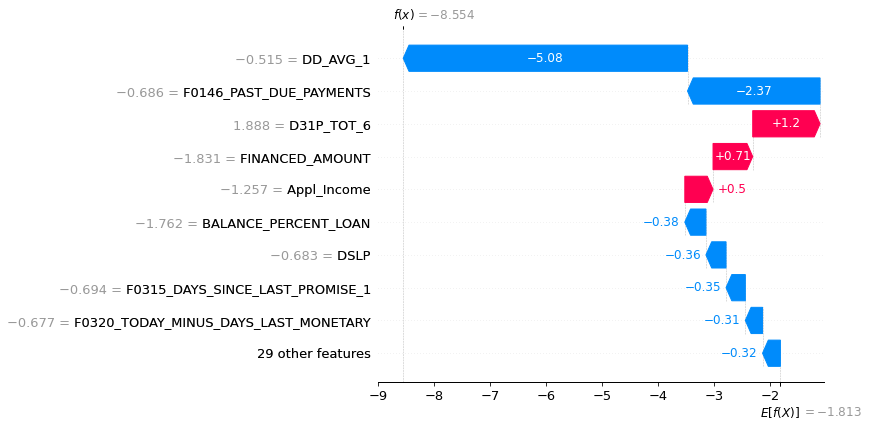

In [145]:
import xgboost
import shap

# train XGBoost model
#model = xgboost.XGBClassifier(max_depth=1, learning_rate=0.5).fit(X, y)

# explain the model's predictions using SHAP values
# (same syntax works for LightGBM, CatBoost, and scikit-learn models)
background = shap.maskers.Independent(X_train_norm)
def f(x):
    return shap.links.identity(xg_1.predict_proba(x, validate_features=False)[:,1])
explainer = shap.Explainer(f, background, link=shap.links.logit)
shap_values = explainer(X_train_norm[:1000])

# visualize the first prediction's explanation
shap.plots.waterfall(shap_values[1])

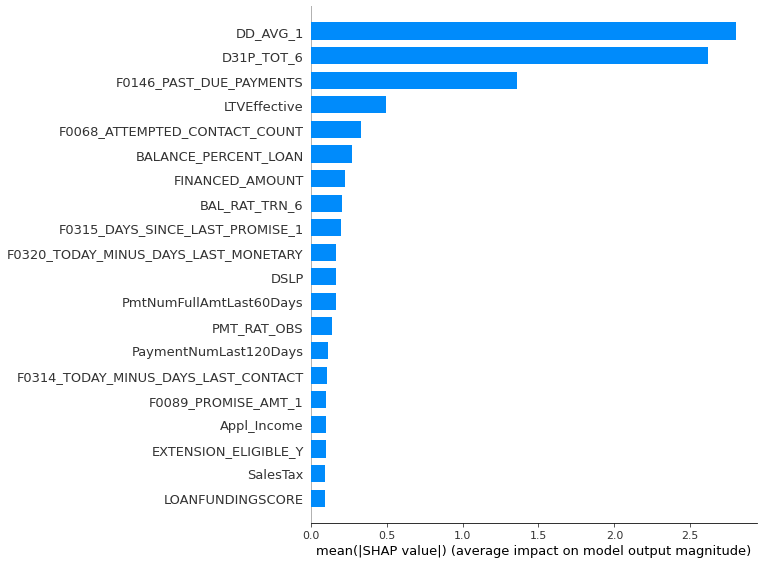

In [142]:
import shap
shap_values = shap.TreeExplainer(xg_1).shap_values(X_train_norm)
shap.summary_plot(shap_values, X_train_norm, plot_type="bar")

# SHAP ANALYSIS PLOT FOR 3 important Attributes

In [179]:
import shap
shap_values = shap.TreeExplainer(model).shap_values(X_train_norm)

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


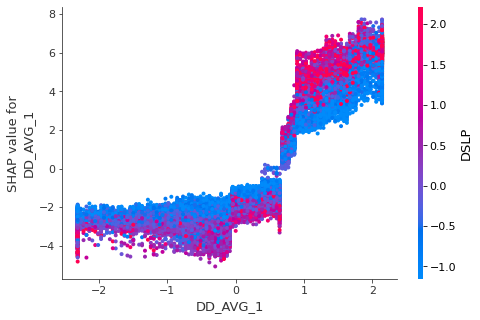

In [181]:
shap.dependence_plot('DD_AVG_1',shap_values,X_train_norm)

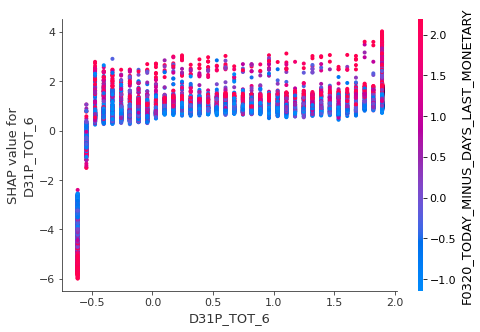

In [182]:
shap.dependence_plot('D31P_TOT_6',shap_values,X_train_norm)

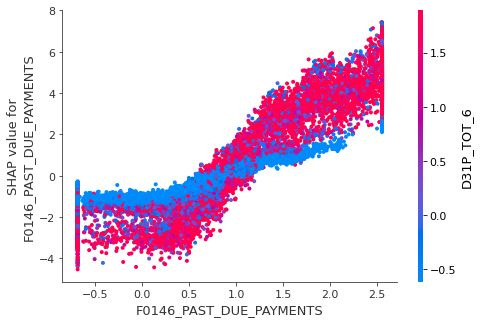

In [184]:
shap.dependence_plot('F0146_PAST_DUE_PAYMENTS',shap_values,X_train_norm)